In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from typing import Tuple
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib
from mlxtend.plotting import plot_decision_regions
import graphviz
import pandas as pd
%load_ext autoreload
%autoreload 2

In [15]:
def generate_example_data() -> Tuple[np.ndarray, np.ndarray]:
    
    def shift(x, y):
        # shift data a bit away from the street
        street_size = .75
        if abs(x-y) < street_size: # almost on boundary
            if x < y:
                x-=street_size
                y+=street_size
            else:
                y-=street_size
                x+=street_size
                
        return [x,y]

    # generate normal distributed data 
    np.random.seed(1)
    x_data_decision_tree = np.array([[np.random.rand(1)[0]*10-5+np.random.normal(scale=2), 
                                      np.random.rand(1)[0]*10-5+np.random.normal(scale=2)] for x in range(3000)])
    
    # free the street in the middle
    x_data_decision_tree = np.array([*map(lambda xy: shift(*xy), x_data_decision_tree)])
    
    # label it positive an negative respectively
    y_data_decision_tree = np.array([*map(lambda pos: 1 if pos[0] < pos[1] else 0, x_data_decision_tree)])
    
    # change some labels randomly
    y_data_decision_tree = np.array(
        [cls if np.random.rand() < 0.95 else (1 if cls == 0 else 0) for cls in y_data_decision_tree])
    
    return x_data_decision_tree, y_data_decision_tree

In [16]:
X_street, y_street = generate_example_data()
X_street_train, X_street_test, y_street_train, y_street_test = train_test_split(X_street, y_street, test_size=.33)

In [46]:
hdtree_linear = HDTreeClassifier( 
                    allowed_splits = [SmallerThanSplit.build()], 
                    information_measure = EntropyMeasure(), 
                    attribute_names=['x', 'y'],
                    max_levels=3,
                    min_samples_at_leaf=1001
                )
hdtree_linear.fit(X_street_train, y_street_train)
hdtree_linear.score(X_street_test, y_street_test)

0.9515151515151515

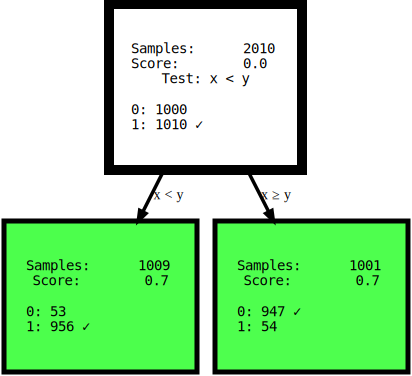

In [47]:
hdtree_linear.generate_dot_graph()

In [48]:
df_titanic = pd.read_csv("train.csv")

In [49]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df_titanic['Name Length'] = df_titanic['Name'].map(lambda name: len(name))
y_titanic = df_titanic['Survived'].map(lambda s: 'Survived' if s == 1 else 'Death')

In [51]:
del df_titanic['Name']
del df_titanic['Ticket']
del df_titanic['Survived']

In [52]:
df_titanic['Survived'] = y_titanic

In [53]:
df_titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Name Length,Survived
0,1,3,male,22.0,1,0,7.2500,NaN,S,23,Death
1,2,1,female,38.0,1,0,71.2833,C85,C,51,Survived
2,3,3,female,26.0,0,0,7.9250,NaN,S,22,Survived
3,4,1,female,35.0,1,0,53.1000,C123,S,44,Survived
4,5,3,male,35.0,0,0,8.0500,NaN,S,24,Death


In [54]:
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(df_titanic.iloc[:,:-1], 
                                                                                    df_titanic.iloc[:,-1], test_size=0.33, 
                                                                                    random_state=42)

In [55]:
col_names = [*df_titanic.columns[:-1]]

In [57]:
col_names

['PassengerId',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin',
 'Embarked',
 'Name Length']

In [86]:
from hdtree import HDTreeClassifier, BhaiyaJi, LessThanHalfOfSplit, EntropyMeasure, SmallerThanSplit, TwentyQuantileSplit, TwentyQuantileRangeSplit, SingleCategorySplit, FixedValueSplit

ImportError: cannot import name 'BhaiyaJi' from 'hdtree' (/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/hdtree/__init__.py)

In [78]:
hdtree_titanic = HDTreeClassifier(
                    allowed_splits=[LessThanHalfOfSplit.build()], 
                    information_measure=EntropyMeasure(), 
                    attribute_names=col_names, 
                    max_levels=3)

In [79]:
hdtree_titanic.fit(X_titanic_train.values, y_titanic_train.values)

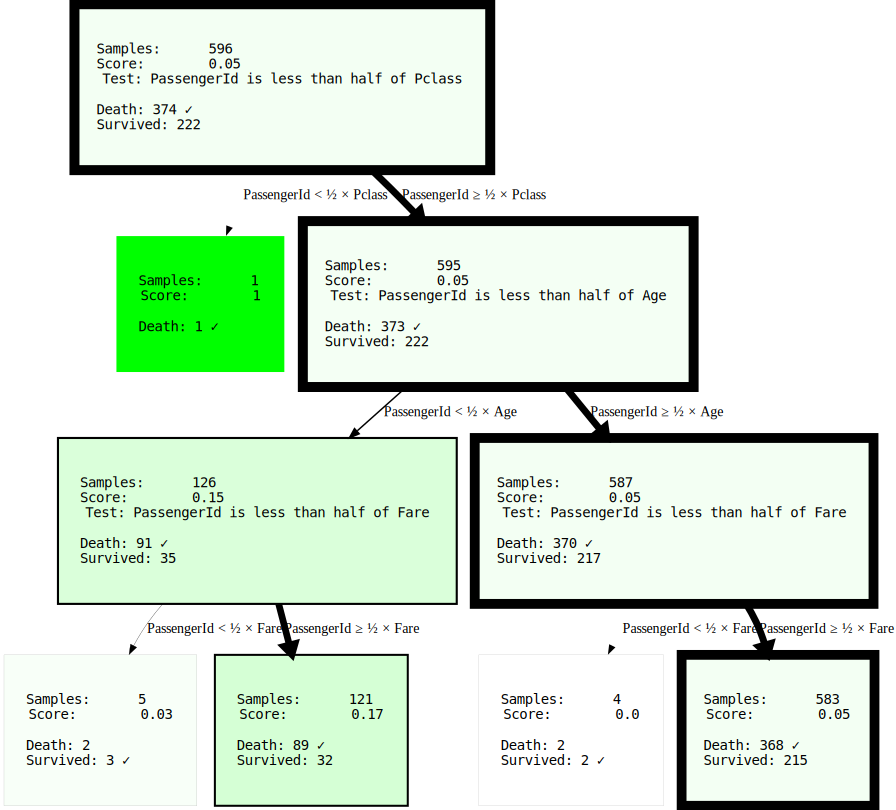

In [80]:
hdtree_titanic.generate_dot_graph()

In [81]:
hdtree_titanic.score(X_titanic_test.values, y_titanic_test.values)

0.5932203389830508

In [91]:
from .hdtree import *

ImportError: attempted relative import with no known parent package